<a href="https://colab.research.google.com/github/santiagorivas0/Prediccion_de_Abandono_de_Clientes_Bancarios/blob/main/An%C3%A1lisis_Bancario_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PREDICCIÓN DEL ABANDONO DE CLIENTES BANCARIOS**

**PROBLEMA EMPRESARIAL**

En nuestro banco se han detectado abandonos sin un motivo a simple vista obvio. El abandono implica una perdida una pérdida de dinero, que puede poner en riesgo la continuidad del negocio. Debido a esto, es extremadamente necesario agregarle inteligencia a nuestro negocio, prediciendo los perfiles de clientes con más probabilidades de abandonar sus créditos, para poder reducir el riesgo eminente de tener una perdida lo suficientemente significativa que impida la continuidad del banco.

Además de reducir el riego de incumplimiento de crédito, podríamos aumentar las ganancias si reconocemos los mejores perfiles de clientes (los que no van a abandonar), dándoles más créditos e iniciando campañas de marketing dirigidas a ellos.

Algunas preguntas disparadoras que nos surgen y luego vamos a intentar responder son:

¿Los clientes con menor salario estimado son los que abandonan más fácil su cuenta bancaria? ¿Los hombres abandonan más fácil que las mujeres?

¿La edad influye en el abandono bancario? 

¿La tenencia de una tarjeta de crédito influye en el abandono bancario? ¿El contexto geográfico importa? 

¿Los clientes con credit score más alto son más propensos a no abandonar?

¿De qué forma se podría evitar o disminuir el abandono?




**CONTEXTO EMPRESARIAL**

Estamos evaluando que en el banco que trabajamos ha habido un incremento el abandono de nuestros clientes dentro de nuestra región de estudio (España, Francia y Alemania), el cual no se debe a circunstancias obvias como lo pueden ser un fraude. Creemos que el aumento se debe a ciertos patrones de comportamiento de acuerdo a parámetros como salario estimado, género, tenencia de tarjeta de crédito y Credit score. 

Además, tenemos sabido que otras empresas del sector han tenido experiencias positivas al analizar, graficar y modelizar el abandono, reduciendo perdidas. Y nosotros contamos con una base de datos, la cual podemos utilizar para tomar acciones en el mismo sentido que la competencia.

**HIPOTESIS**

A partir de ciertas variables es posible predecir y explicar el abandono de nuestros clientes. Por eso, en primera instancia, con el análisis exploratorio 
obtendremos insights sobre como impactan las variables sobre el abandono y las relaciones que hay entre las variables dependientes e independiente. Luego, mediente un modelo de Machine Learning vamos a inferir si un cliente va a abandonar o no, con evidencia estadistica.

**DESARROLLLO ANALITICO**








1) **DATOS**

Los datos son sobre clientes de un banco, donde la varaible ha explicar es "Exited", y los obtubimos de tal lado .... 

2) **VARIABLES**

1.	RowNumber: Cantidad de clientes enumerados del 1 al 10.0000
2.	CustomerId: ID de nuestro cliente
3.	Surname: Apellido del cliente
4.	CreditScore: Puntaje de crédito del cliente
5.	Geography: Residencia del cliente
6.	Gender: Sexo
7.	Age: Edad del cliente
8.	Tenure: Tenencia del cliente
9.	Balance: Balance del cliente
10.	NumOfProducts: Número de Productos
11.	HasCrCard: Tenencia de tarjeta de crédito (1 si, 0 en otro caso)
12.	IsActiveMember: Miembro activo (1 si, 0 en otro caso)
13.	EstimatedSalary: Salario estimado del cliente
14.	Exited: Abandono del cliente (1 si, 0 en otro caso)

3) **MODELOS**

1.	PCA
2.  KMEANS
3.  CLUSTER JERARQUICO
4.	REGERSION LINEAL SIMPLE
5.	REGRESION LOGISTICA
6.  ADABOOST CLASSIFIER
7.	RANDOM FOREST 
8.	HIST GRADIENT BOOSTING CLISSIFIER


In [2]:
#LIBRERIAS

#MANIPULACION DE DATOS, CALCULOS Y GRÁFICOS
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

#WARNINGS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#SELECCION MUESTRAS Y ESTANDARIZACION
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#MODELOS
#1_ ANALISIS DE COMPONENTES PRINCIPALES
from sklearn.decomposition import PCA
#2_ KMEANS
from sklearn.cluster import KMeans
#3_ CLUSTER JERARQUICO
from sklearn.cluster import AgglomerativeClustering as agc
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
#4_ REGERSION LINEAL SIMPLE
import statsmodels.api as sm
#5_ REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression
#6_ ADABOOST CLASSIFIER
from sklearn.ensemble import AdaBoostClassifier
#7_ RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
#8_ HIST GRADIENT BOOSTING CLISSIFIER
from sklearn.ensemble import HistGradientBoostingClassifier

#METRICAS
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#SELECCION MODELOS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

**IMPORTAMOS LOS DATOS**

In [3]:
df = pd.read_csv('Abandono_Clientes_Bancarios.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**DATA WRANGLING** 

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Este DataSet no contiene ningún nulo.

In [7]:
df=df.drop_duplicates()
df.shape

(10000, 14)

Nuestro DataSet no contiene ningún dato duplicado.

Borramos variables que no son relevantes para el estudio

In [8]:
data = df.drop(["RowNumber", "Surname"], axis=1)

Generamos las dummys para paises y género, a su vez, borramos la primer columna para no tener colinealidad perfecta

In [9]:
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True)
data.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**ANALISIS EXPLORATORIO UNIVARIADO**

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


Datos Relevantes:

*   El porcentaje de abandonos es de 20% aproximadamente.
*   Todos los clientes son mayores de 18 años y la media es de 38 años.
*   El salario estimado medio es de 100009 dolares anuales, y la desviación estandar de 57510 dolares.

HISTOGRAMAS DE VARIABLES CONTINUAS

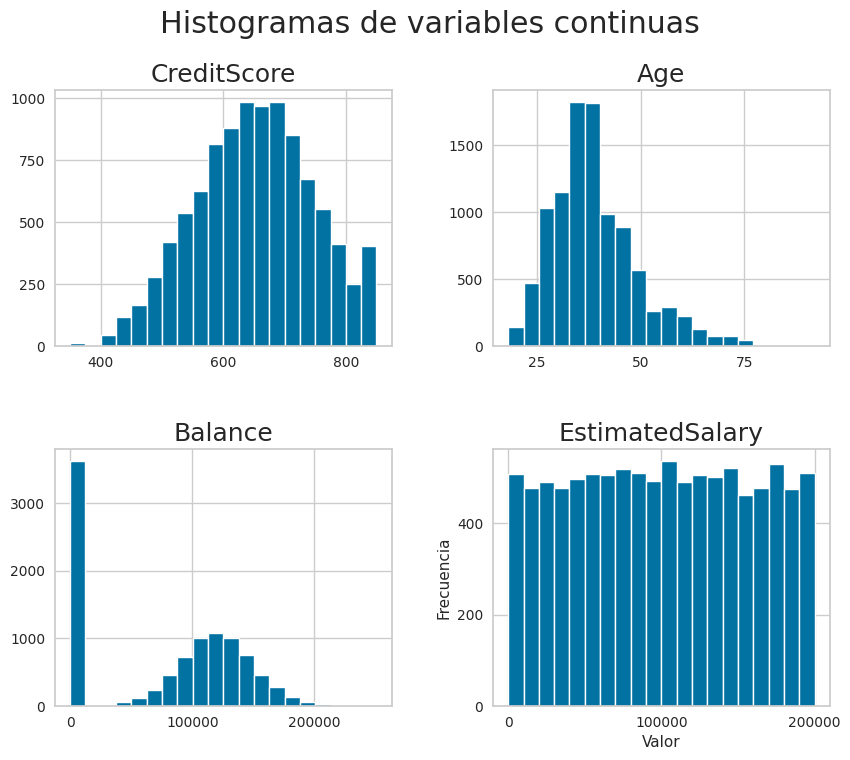

In [11]:
# Seleccionar las columnas para hacer los histogramas
columnas = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Configurar el tamaño de los subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.set(font_scale=1.5)

# Hacer el histograma para cada columna y graficarlos en subplots diferentes
for i, columna in enumerate(columnas):
    ax = axs[int(i/2), i%2]  # Obtener el subplot correspondiente
    ax.hist(data[columna], bins=20)
    ax.set_title(columna)  # Configurar el título del subplot

# Configurar las etiquetas y leyenda del gráfico general
fig.suptitle('Histogramas de variables continuas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Mostrar el gráfico
plt.show()

En la gráfica de Credit Score se aprecia una distribución parecida a la Normal, mientras que la gráfica Age es más sesgada hacia la izquierda como una Chi Cuadrado.

El balance tiene una alta acumulación en 0, ya que hay muchos clientes que tienen la cuenta sin dinero.

En el gráfico de Stimated Salary no vemos ningún patron a simple vista.

GRAFICO DE CAJA PARA VARIABLES CONTINUAS

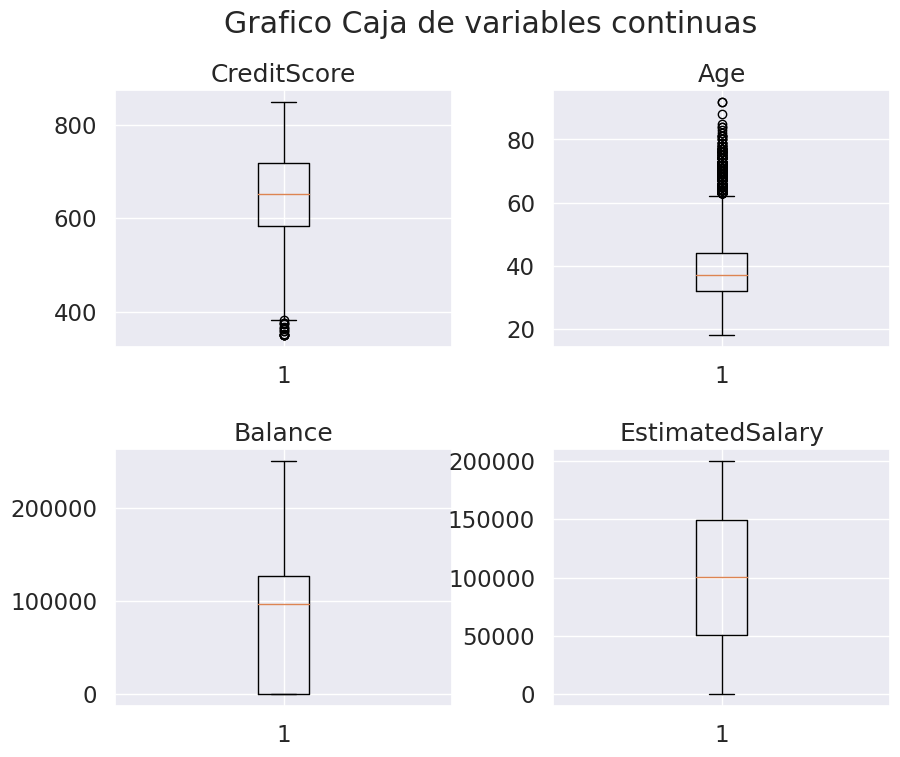

In [12]:
# Seleccionar las columnas para hacer los histogramas
columnas = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Configurar el tamaño de los subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.set(font_scale=1.5)

# Hacer el histograma para cada columna y graficarlos en subplots diferentes
for i, columna in enumerate(columnas):
    ax = axs[int(i/2), i%2]  # Obtener el subplot correspondiente
    ax.boxplot(data[columna],)
    ax.set_title(columna)  # Configurar el título del subplot

# Configurar las etiquetas y leyenda del gráfico general
fig.suptitle('Grafico Caja de variables continuas')

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Mostrar el gráfico
plt.show()

Hay bastantes datos atípicos en la edad, veíamos en la tabla que la máxima es de 92 años.

GRAFICO DE BARRAS PARA VARIABLES CATEGORICAS

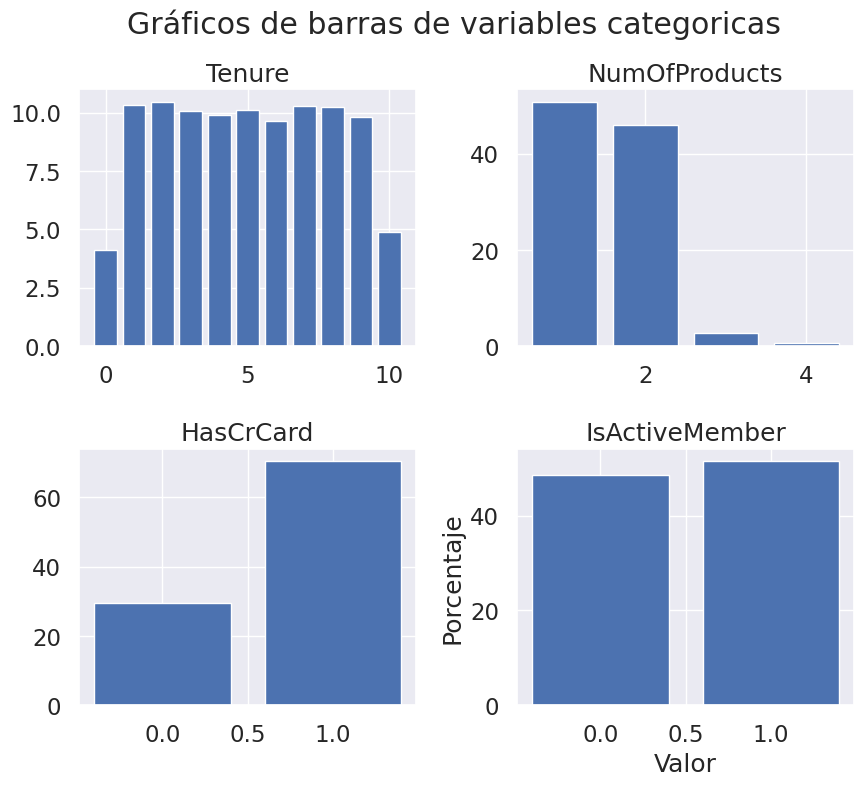

In [13]:
# Seleccionar las columnas para hacer los gráficos de barras
columnas = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Configurar el tamaño del gráfico general
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)

# Hacer el gráfico de barras para cada columna y graficarlos juntos
for i, columna in enumerate(columnas):
    plt.subplot(2, 2, i+1)  # Seleccionar el subplot correspondiente
    porcentajes = data[columna].value_counts() / len(data) * 100
    plt.bar(porcentajes.index, porcentajes.values)
    plt.title(columna)  # Configurar el título del subplot

# Configurar las etiquetas y título del gráfico general
plt.suptitle('Gráficos de barras de variables categoricas')
plt.xlabel('Valor')
plt.ylabel('Porcentaje')

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Mostrar el gráfico
plt.show()

La mayoría de clientes tienen tarjeta de crédito, y entre 1 y 2 productos.

El porcentaje de miembros es casi la mitad de nuestra muestra.

La tenencia no refleja un patrón marcado.

GRAFICO DE TORTA PARA VARIABLES EN FORMATO DE TIPO TEXTO

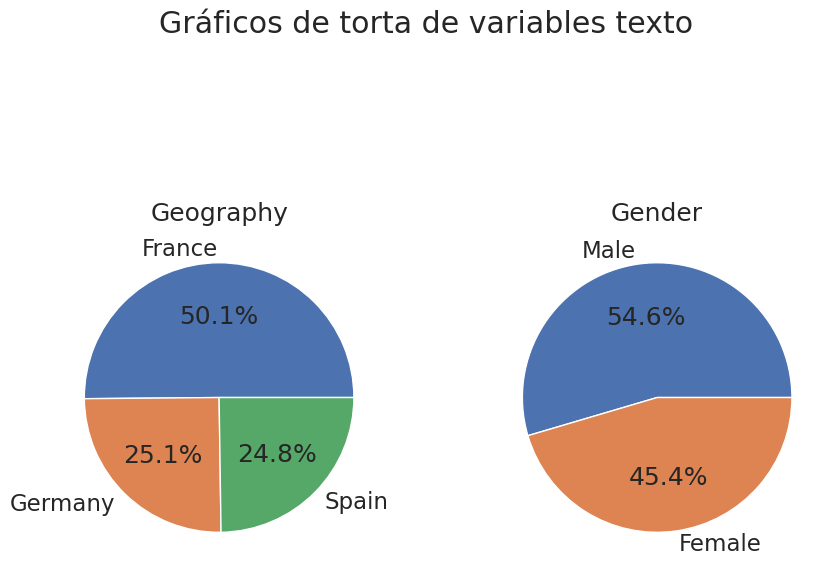

In [14]:
# Seleccionar las columnas para hacer los gráficos de torta
columnas = ['Geography', 'Gender']

# Configurar el tamaño del gráfico general
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['text.color'] = 'white'
sns.set(font_scale=1.5)


# Hacer el gráfico de torta para cada columna y graficarlos juntos
for i, columna in enumerate(columnas):
    plt.subplot(1, 2, i+1)  # Seleccionar el subplot correspondiente
    frecuencias = df[columna].value_counts()
    plt.pie(frecuencias.values, labels=frecuencias.index, autopct='%1.1f%%')
    plt.title(columna)  # Configurar el título del subplot

# Configurar el título del gráfico general
plt.suptitle('Gráficos de torta de variables texto')

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Mostrar el gráfico
plt.show()

La mayoría de clientes son de Francia.

EL género es el predominante en nuestra muestra.

PORCENTAJE DE ABANDONO EN GRAFICO DE TORTA

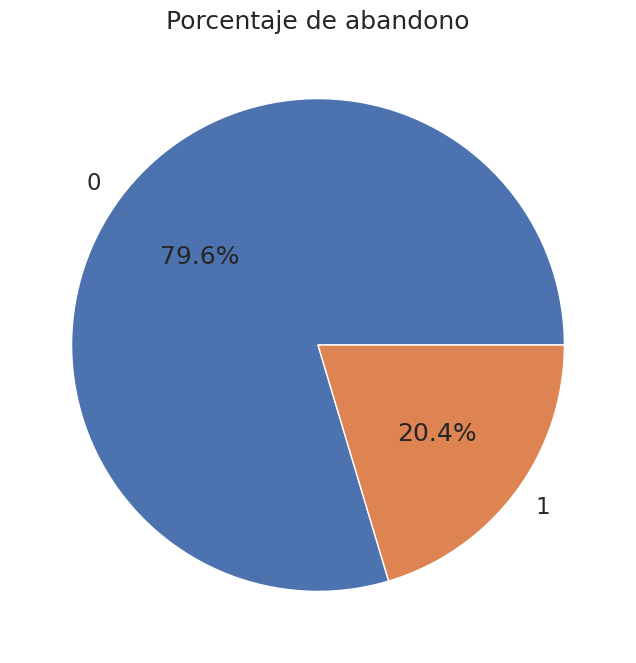

In [15]:
frecuencias = data['Exited'].value_counts()

# Configurar el tamaño del gráfico y el color de las etiquetas en blanco
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['text.color'] = 'white'
sns.set(font_scale=1.5)

# Crear el gráfico de torta
plt.pie(frecuencias.values, labels=frecuencias.index, autopct='%1.1f%%')

# Configurar el título del gráfico
plt.title('Porcentaje de abandono')

# Mostrar el gráfico
plt.show()

**ANALISIS EXPLORATORIO MULTIVARIADO Y OBTENCION DE INSIGHTS**

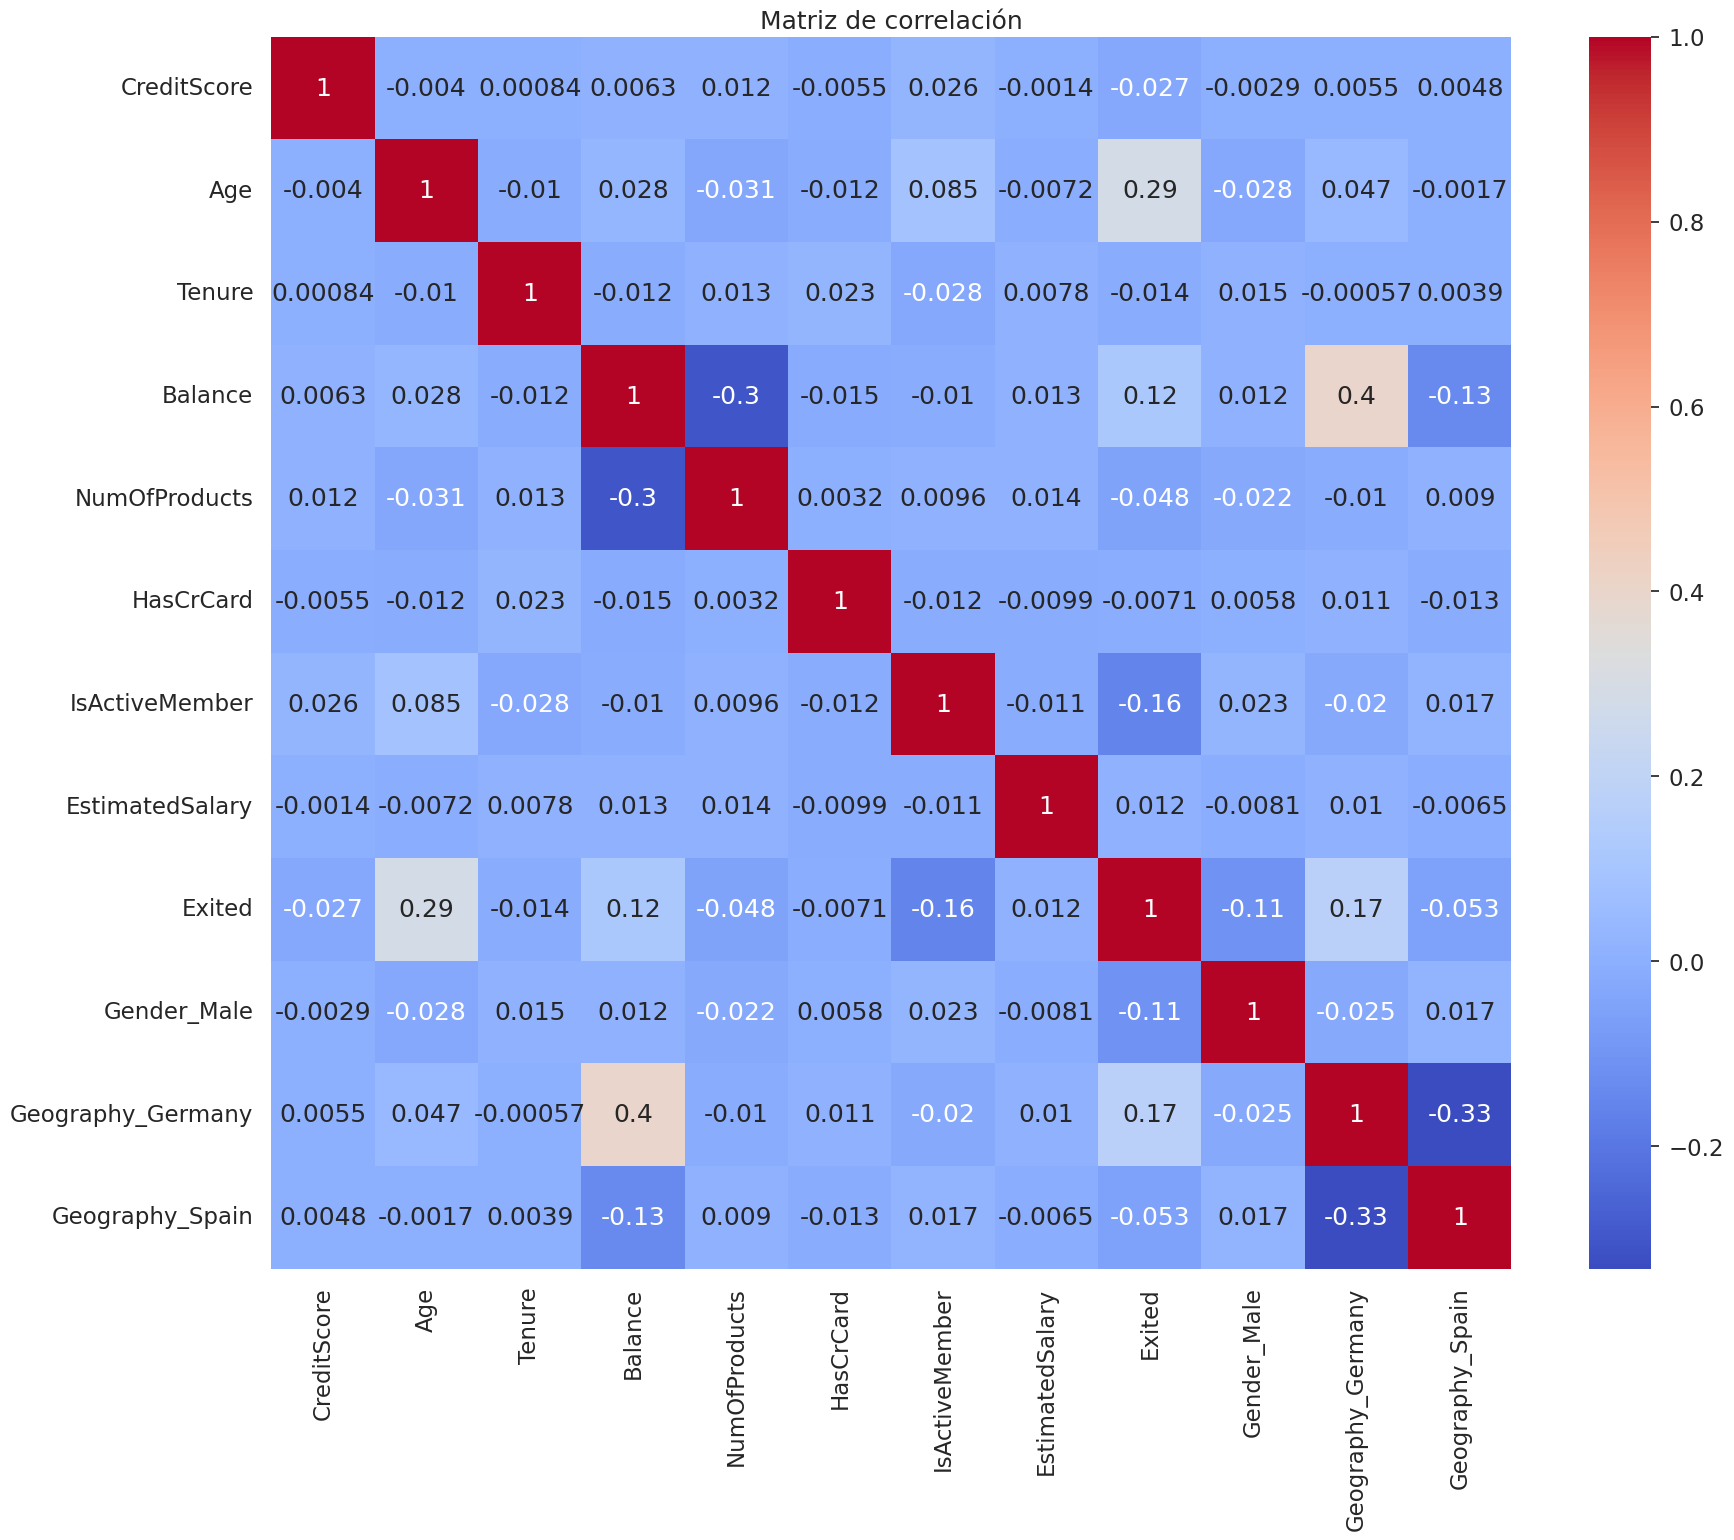

In [16]:
# Eliminar la columna 'CustomerId'
data1 = data.drop('CustomerId', axis=1)

sns.set(font_scale=1.5)

# Calcular la matriz de correlación
corr_matrix = data1.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 16))


# Crear el mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Configurar el título del gráfico
plt.title('Matriz de correlación')

# Mostrar el gráfico
plt.show()

Viendo la matriz de correlación no hay variables altamente correlacionadas, por lo que a priori, no vamos a tener problemas de multicolinealidad en los modelos.

RELACIONES ENTRE VARIABLES RELEVANTES

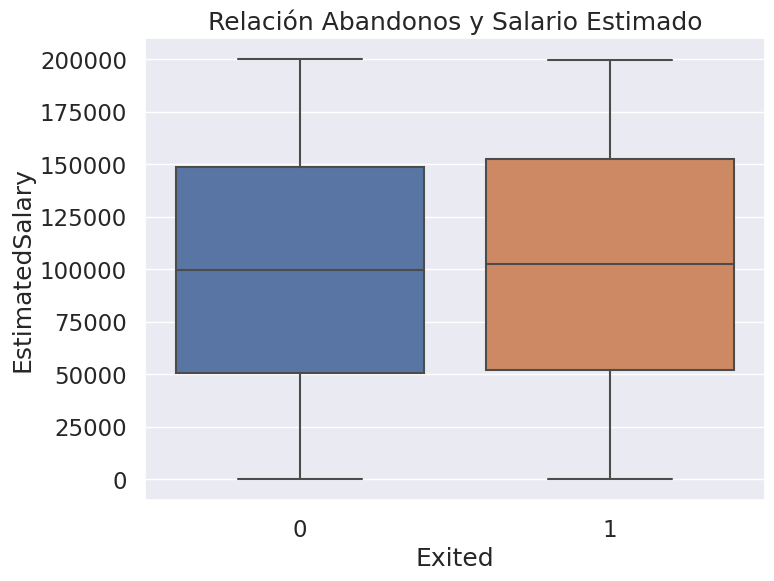

In [17]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
sns.boxplot (x='Exited', y='EstimatedSalary', data= df)
plt.title("Relación Abandonos y Salario Estimado")

plt.show()

Como banco, esperabamos que los clientes los cuales tienen salario estimado más bajo sean más propensos a abandonar más fácil. Para que esta suposición se cumpla, tendríamos que haber observado que el boxplot de la derecha este por debajo del de la izquierda ó que el boxplot de la izquierda sea superior al de la derecha, cosa que no ocurrió. Lo que a priori nos dice que no existe una relación entre el salario y el abandono.

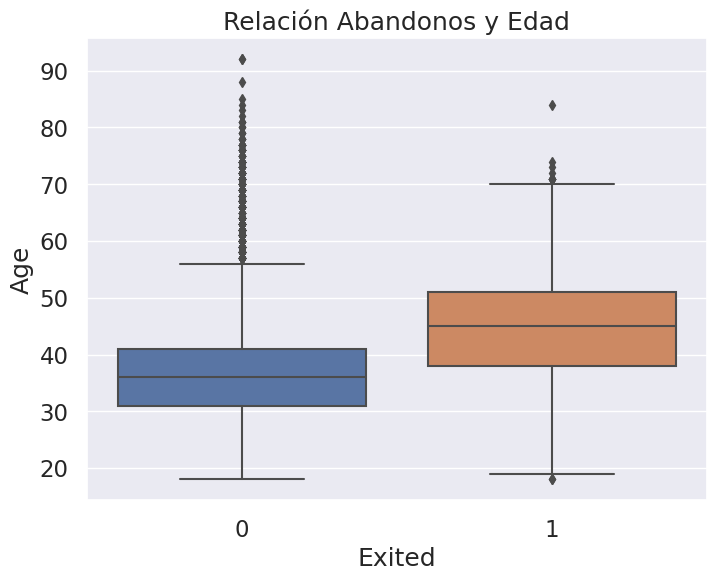

In [18]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
sns.boxplot (x='Exited', y='Age', data= df)
plt.title("Relación Abandonos y Edad")

plt.show()

Es de esperarse que, a mayor edad los clientes abandonen menos fácil debido a varias cuestiones, como por ejemplo su madurez, responsabilidades, etc. A pesar de esto, el gráfico nos muestra que los clientes que abandonaron, su edad es concentrada en mas años que en clientes que no abandonaron. Aunque se aprecian varios datos atípicos en los clientes que no abandonaron (más que en los abandonados)

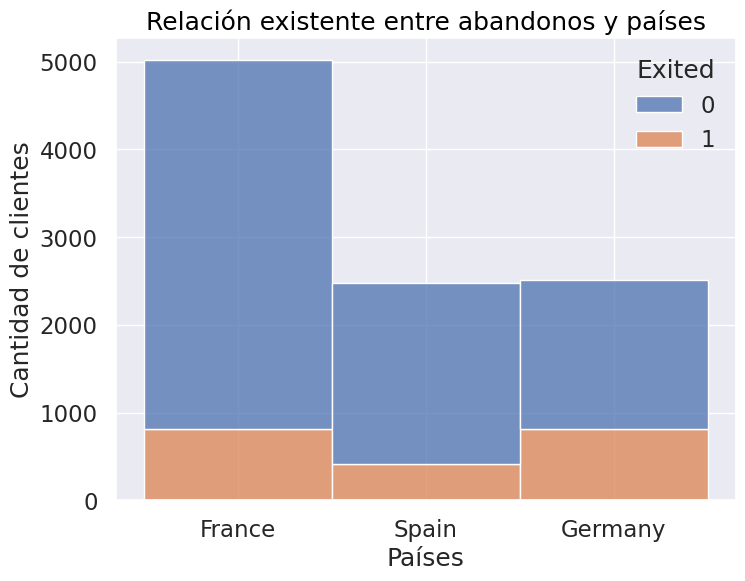

In [19]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)


sns.histplot(data=df, x="Geography", hue="Exited", multiple="stack");

plt.title('Relación existente entre abandonos y países', color='black')
plt.xlabel('Países')
plt.ylabel('Cantidad de clientes')

plt.show()

Se observa que la relación que tiene Alemania entre abandonos/no abandonos es mayor que en la de los otros dos países (Francia y España).

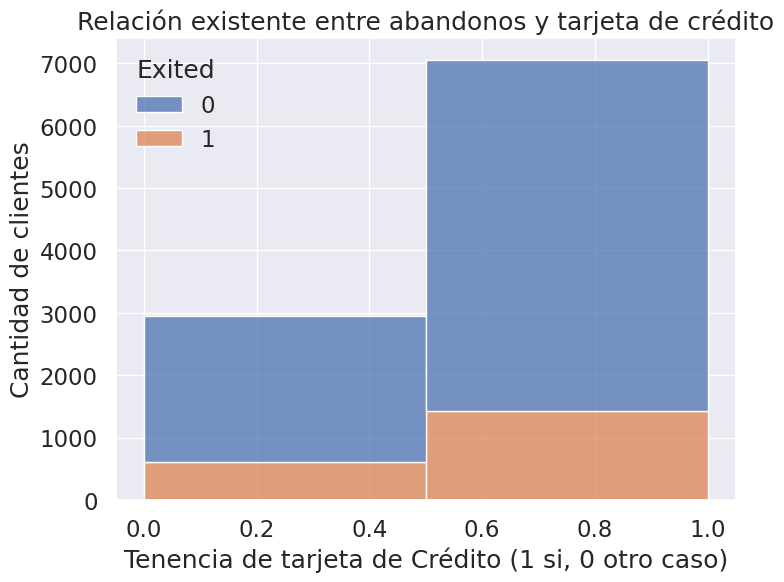

In [20]:

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)

ax = sns.histplot(data=df, x="HasCrCard", hue="Exited", multiple="stack", bins=2);

ax.set_title('Relación existente entre abandonos y tarjeta de crédito')
ax.set_xlabel('Tenencia de tarjeta de Crédito (1 si, 0 otro caso)')
ax.set_ylabel('Cantidad de clientes')

plt.show()

Podemos ver la relación que existe entre la tenencia de una tarjeta de crédito 
y el abandono. La relación abandono/no abandono es mas notoria en personas que no tienen tarjeta de crédito. En cambio, clientes que tienen tarjeta de crédito, parece ser que abandonan menos.

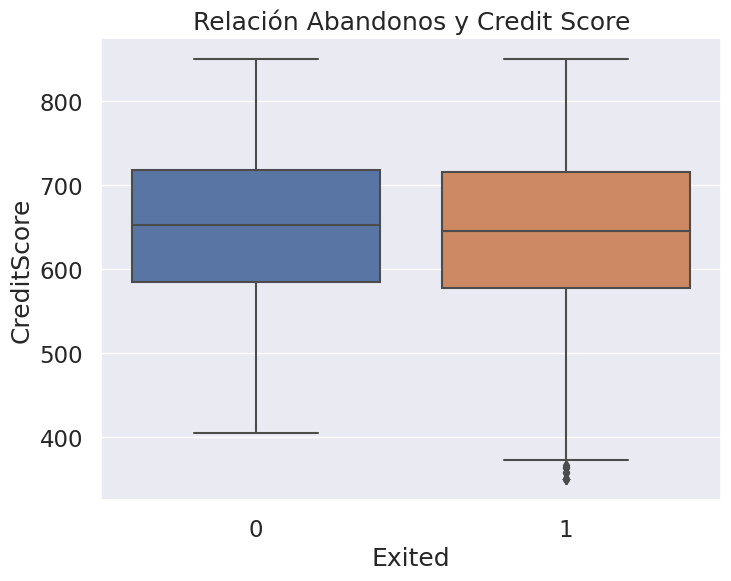

In [21]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)

sns.boxplot (x='Exited', y='CreditScore', data= df)
plt.title("Relación Abandonos y Credit Score");

plt.show()

Es de esperarse que los clientes que tienen menos Credit Score abandonen más fácil. Observamos que los clientes que no abandonaron (0), la acumulación hasta la mediana está levemente por encima de clientes que abandonaron (1). Además, vemos muchos datos atípicos por debajo del bigote inferior de clientes que abandonaron. Esto nos puede hacer ver que clientes con Credit Score muy bajos son propensos a abandonar con más facilidad.

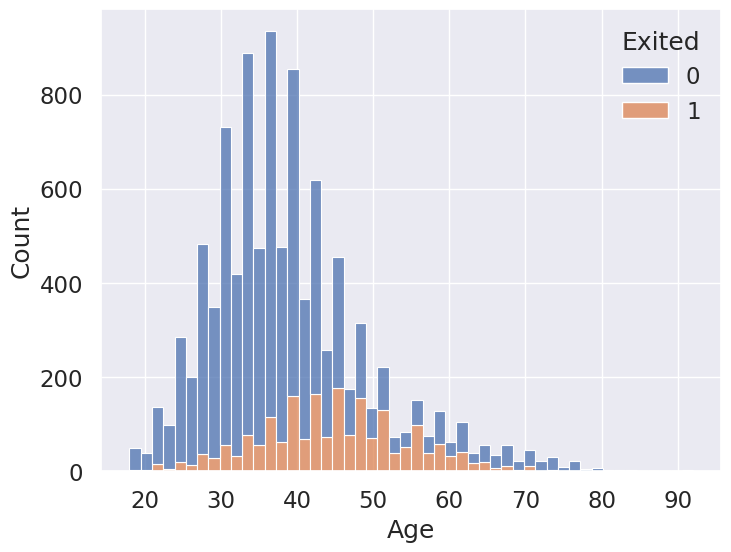

In [22]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)

sns.histplot(data=df, x="Age", hue="Exited", bins=50, multiple="stack");
ax.set_title('Relación existente entre abandonos y edades', color='blue')
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad de clientes');

Observamos que las edades que abandonan más son las que estan en el rango etario de 35 a 50 años. Esto no tiene porque signifar necesariamente que las personas de esta categoria esten abandonando mas que otros rangos de edades debido a que posiblemente hayan mas personas muestreadas en dicha franja.

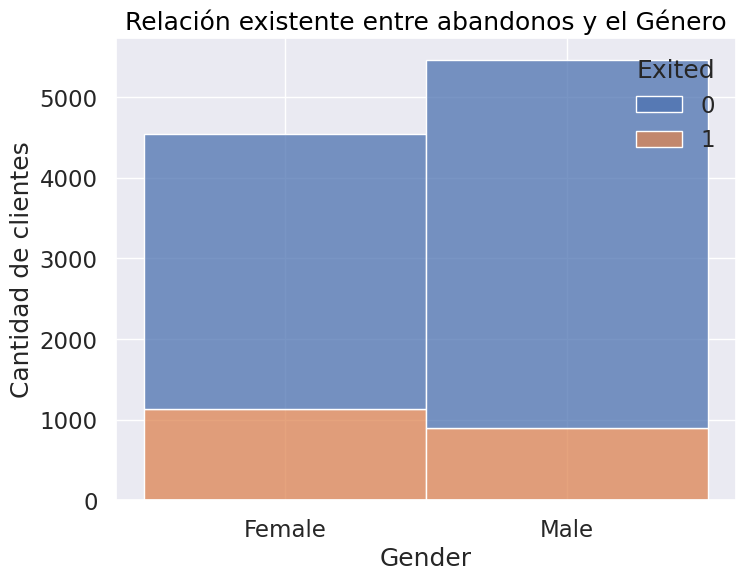

In [23]:
plt.figure(figsize=(8, 6))

sns.set(font_scale=1.5)

sns.histplot(data=df, x="Gender", hue="Exited", multiple="stack");

plt.title('Relación existente entre abandonos y el Género', color='black')
plt.xlabel('Gender')
plt.ylabel('Cantidad de clientes')


plt.show()



En el gáfico anterior se comparó la relación del género de los clientes, con el abandono. Se puede observar que tienen más abandono las mujeres; mientras que los hombres son más en la muestra y tienen un abandono inferior. En este análisis no se ha tenido en cuenta la edad de los clientes ni el poder adquisitivo. 

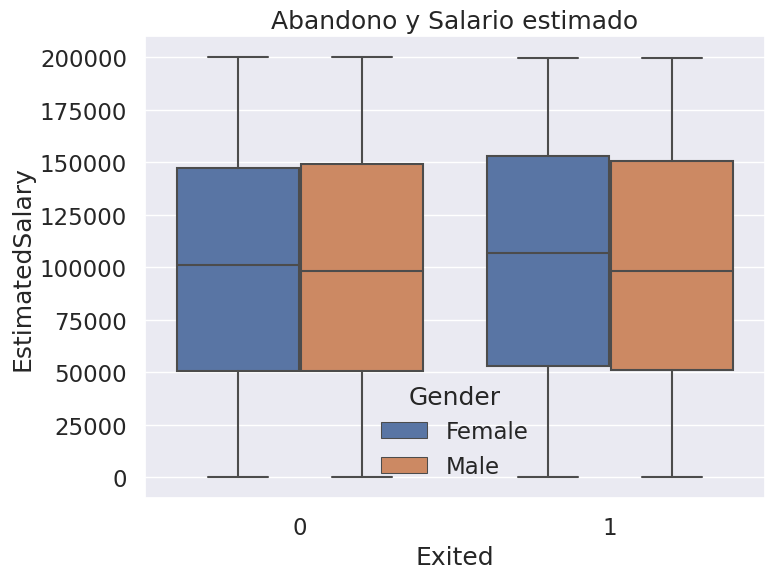

In [24]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)

sns.boxplot (x='Exited', y='EstimatedSalary', hue = 'Gender', data= df)
plt.title("Abandono y Salario estimado");

En este gráfico se evalúa la relación entre el abandono, el salario estimado y el género de los clientes. Se puede apreciar que las mujeres que más abandonan son las que tienen mayor salario, mientras que los hombres que abandonan tienen menor salario estimado. Esta diferenciación nos demuestra que la conlusión sacada a priori entre la relación entre el abandono y el salario estimado no son tan independientes si se las diferencia por género.

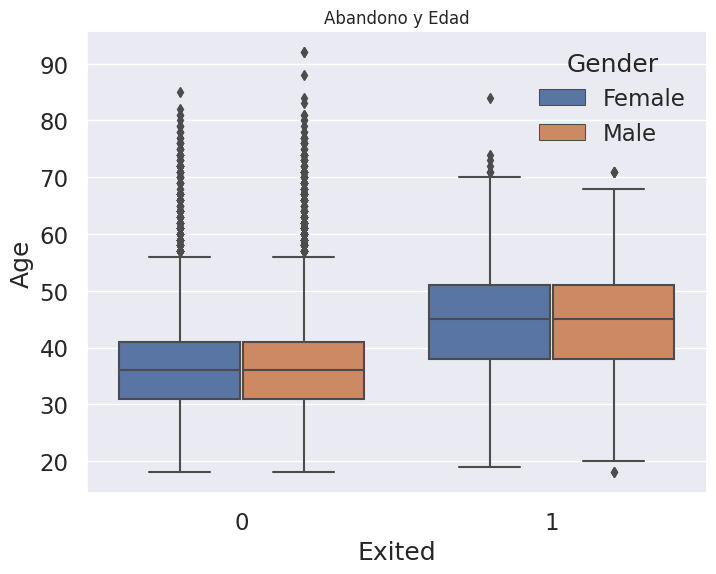

In [25]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)

sns.boxplot (x='Exited', y='Age', hue = 'Gender', data= df)
plt.title("Abandono y Edad", fontsize=12);

En esta figura se evalúa el abandono en relación a la edad y el género. Se puede ver que las mujeres y los hombres que abandonan y los que mantienen los préstamos son los de mayor edad. Es decir independientemente del género los más jóvenes no abandonan los pagos de los préstamos. Si bien cuando se analizó el abandono vs la edad, reflejaba lo mismo, al diferenciarlo por género se mantiene la relación anterior.

**ANALISIS FACTORIAL Y DE GRUPOS**

En esta etapa analizamos las correlaciones entre las variables y grupos de clientes. Para que luego en la predicción del abandono, poder tener nuestra cartera segmentada y sacar conlusiones sobre grupos de clientes, que a posteriori nos permita tomar acciones dirigiadas a segementos.

In [26]:
# Seleccionar las variables continuas para estandarizar
variables_continuas = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Crear el objeto StandardScaler
scaler = StandardScaler()

data_scaler = data

# Estandarizar las variables continuas
data_scaler[variables_continuas] = scaler.fit_transform(data_scaler[variables_continuas])

# Mostrar los datos estandarizados
data_scaler.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,0,0,0
1,15647311,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,0,1
2,15619304,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,0,0,0
3,15701354,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0,0
4,15737888,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,0,1


Estandandarizamos las variables continuas para mejorar la eficiencia de los modelos.

In [27]:
Xc = data_scaler[['Age', 'Balance', 'EstimatedSalary']]

Seleccionamos las variables de edad, balance y salario estimado, para armar perfiles de clientes.

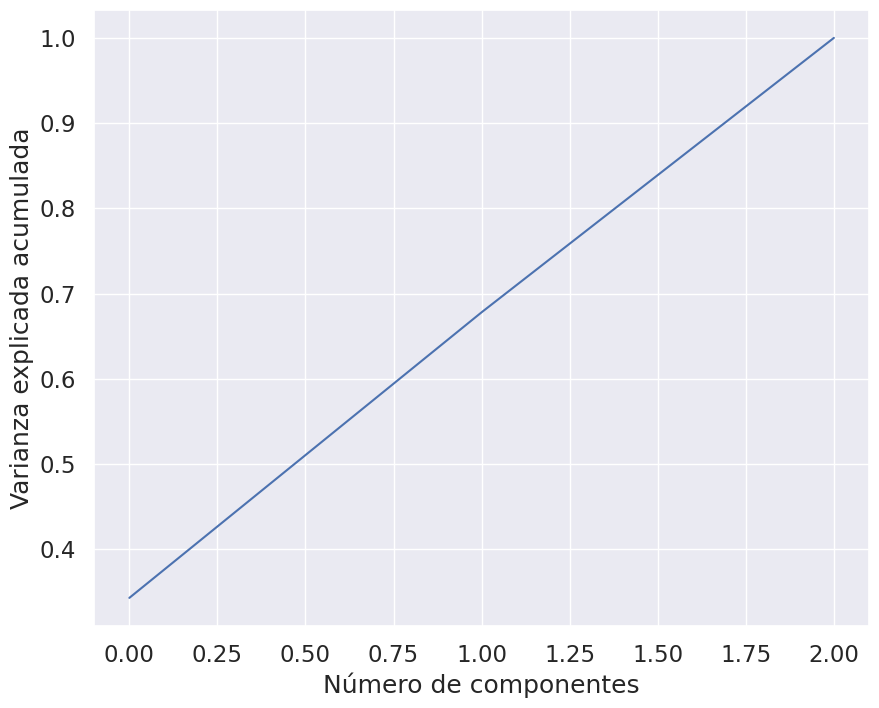

In [28]:
# Crear el objeto PCA
pca = PCA()

# Aplicar el PCA a los datos
pca.fit(Xc)

# Graficar la varianza explicada en función del número de componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

Dos componentes explican muy poca variabilidad y ademas observando la matriz de correlación, las variables son relativamente independientes. No tendría sentido reducir la dimensión.

Continuamos a la parte de armado de clusters sin reduccir dimensiones de las variables.

K-MEANS

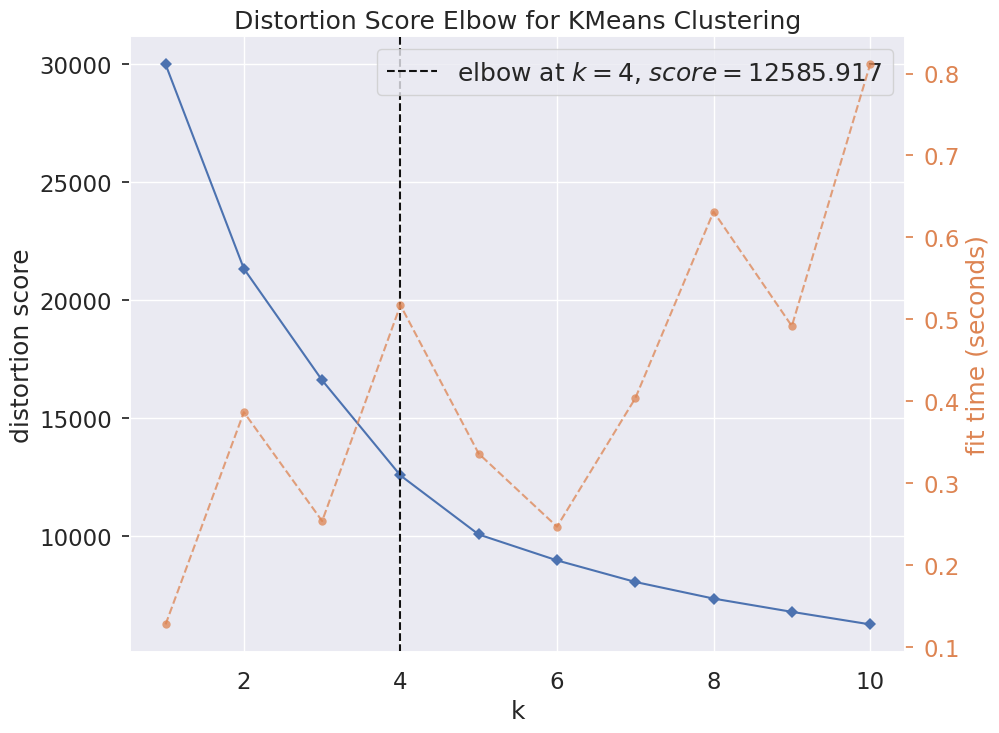

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
#Método del codo

plt.rcParams['figure.figsize'] = 10, 8
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(Xc)
visualizer.poof()

El metodo del codo nos sugiere utilizar 4 clusters.

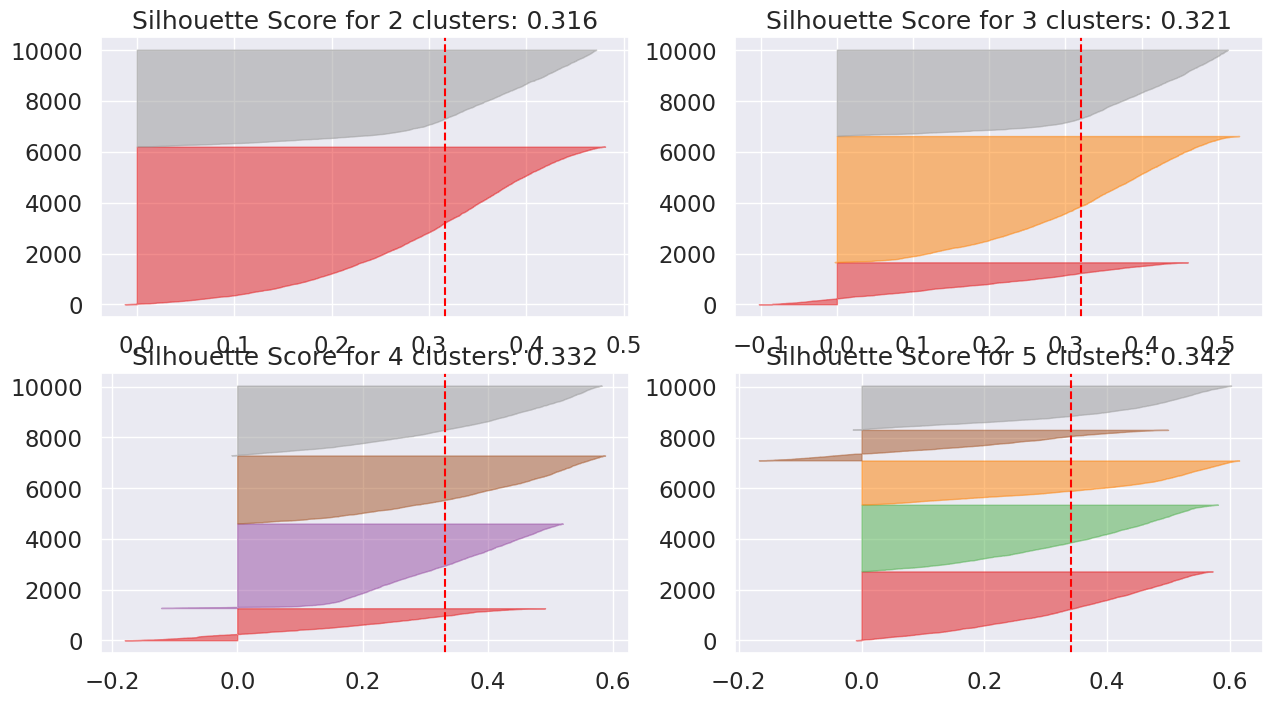

In [30]:
# Silhouette Scores 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(Xc)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(Xc, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)


El método de la silueta tambien nos sugiere utilizar 4 clusters.

Dadas las métricas nos quedaremos con 4 clusters de clientes. 

In [31]:
#Entrenamiento del modelo
modelKM = KMeans(n_clusters = 4)
modelKM.fit(Xc)

#Generacion de Clusters
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : pcaPredKM.value_counts(), 
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
3   3328    33.28
2   2743    27.43
1   2670    26.70
0   1259    12.59


Podemos representar las variables de balance, edad y salario estiamdo en 4 grupos.

Modelizamos los clusters con el algorítmo de clusters jerárquico para compararlo con el K-Means

Hirarchical Clustering con los 4 Clusters 

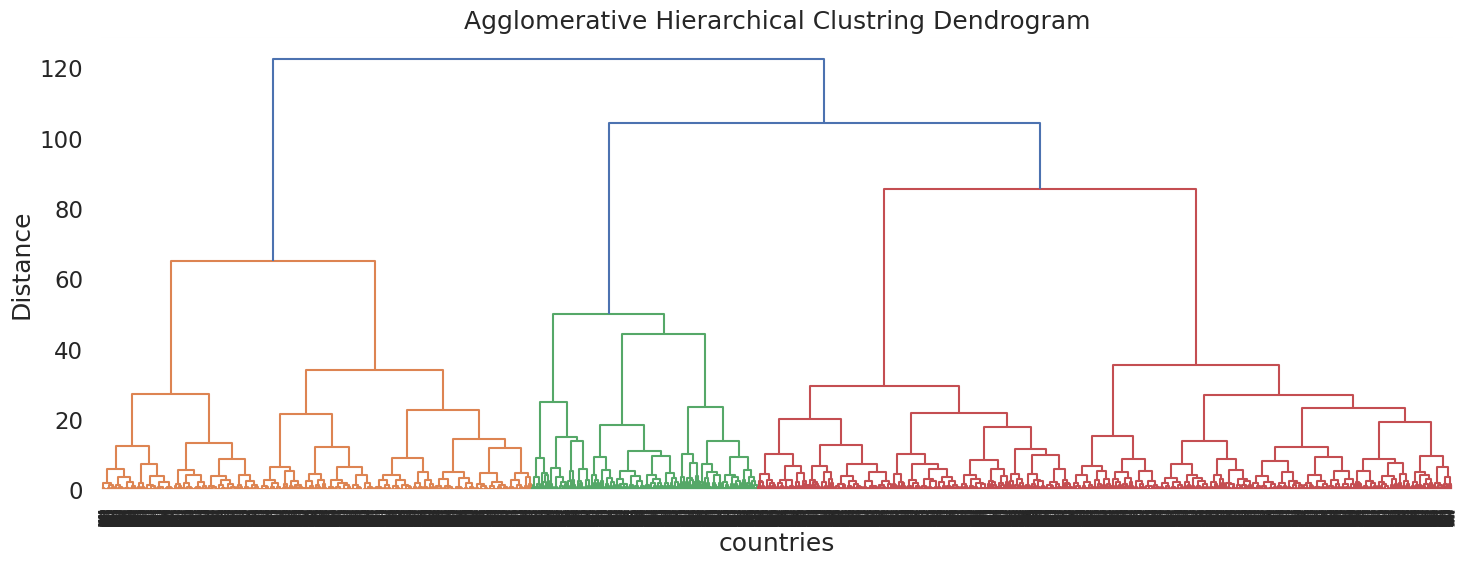

In [32]:
link = linkage(Xc, metric = 'euclidean', method = 'ward')

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('countries')
plt.ylabel('Distance')
dendrogram(link)
plt.tight_layout()

In [33]:
modelAGC = agc(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
modelAGC.fit(Xc)
sPredAGC = pd.Series(modelAGC.labels_)
print(pd.concat({'count' : sPredAGC.value_counts(), 
                 'percent' : round(sPredAGC.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

   count  percent
0   3188    31.88
1   2810    28.10
3   2335    23.35
2   1667    16.67


### Hirarchical Clustering Scores ###


In [34]:
print('Silhouette Score:', '%.2f'%sil_score(Xc, sPredAGC))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(Xc, sPredAGC))

Silhouette Score: 0.30
Davies Bouldin Score: 1.08


### K-Means Clustering Scores ###

In [35]:
print('Silhouette Score:', '%.2f'%sil_score(Xc, pcaPredKM))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(Xc, pcaPredKM))

Silhouette Score: 0.33
Davies Bouldin Score: 0.99


Las métricas de silueta y David Bouldin dan como mejor modelo al K-Means. Por esto, vamos a representar los grupos con K-Means y 4 clusters.

In [36]:
data["predicted_cluster"] = modelKM.fit(Xc).labels_
data.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,predicted_cluster
0,15634602,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,0,0,0,3
1,15647311,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,0,1,2
2,15619304,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,0,0,0,2
3,15701354,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0,0,3
4,15737888,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,0,1,1


In [37]:
df["predicted_cluster"] = modelKM.fit(Xc).labels_
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,predicted_cluster
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2


In [38]:
df[['Age', 'Balance', 'EstimatedSalary', 'Exited', 'predicted_cluster']].groupby('predicted_cluster').mean()

,Age,Balance,EstimatedSalary,Exited
predicted_cluster,,,,
0,36.080510,121338.129413,151667.623956,0.206922
1,35.734675,1461.008032,99345.397975,0.117788
2,36.169854,122046.548425,49444.410202,0.196100
3,59.354762,80496.308143,96892.892524,0.439683


Se observan 4 grupos:

* 0: Jóvenes con un balance alto e ingresos bajos.(grupo con mas fidelidad) 
* 1: Mayores con un balance medio e ingresos medios (grupo que más abandono tiene).
* 2: Jóvenes con balance alto e ingresos altos.
* 3: Jóvenes con un balance bajo e ingresos medios.

GRAFICO EN 3D DE LOS CLUSTERS

In [39]:
datos_cluster = data[['Age', 'Balance', 'EstimatedSalary', 'Exited', 'predicted_cluster', 'CustomerId']]

# Crear el gráfico dinámico con Plotly
fig = px.scatter_3d(datos_cluster, x='Age', y='Balance', z='EstimatedSalary', color='predicted_cluster', hover_name='CustomerId')

# Mostrar el gráfico
fig.show()

**MODELIZAR LA PROBABILIDAD DE ABANDONO CON VARIOS ALGORITMOS**

Regresión Lineal -> Modelo básico para ver variables significativas y también los signos de los Beta

In [40]:
X = data.drop(['CustomerId', 'Exited', 'predicted_cluster'], axis =1)
y = data['Exited']

In [41]:
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Exited   R-squared (uncentered):                   0.294
Model:                            OLS   Adj. R-squared (uncentered):              0.293
Method:                 Least Squares   F-statistic:                              377.6
Date:                Mon, 01 May 2023   Prob (F-statistic):                        0.00
Time:                        01:02:15   Log-Likelihood:                         -4495.1
No. Observations:               10000   AIC:                                      9012.
Df Residuals:                    9989   BIC:                                      9092.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Resultados:

*   Los hombres en promedio tienen una menor probabilidad de abandonar.
*   Los miembros en promedio tienen menor probabilidad de abandonar.
*   A mayor Credit Score se estima que un aumento en una unidad disminuye en 0,01 la probabilidad de abandono, ceteris paribus.
*   Todas las variables son significativas menos el salario estimado.

La regresión lineal tambien la utilizamos para clasificar, como un modelo de probabilidad lineal. Como la variable dependiente es una dummy (abandona o no) lo que arroja es la estimación de la probabilidad de abandono (al igual que la regresion logistica). La motivación de incluir la regresión lineal es poder visualizar los betas, los cuáles nos idican la incidencia de las variables dependientes (si afectan positivamento o negativamente el abandono) y sin son significativas (mediante los p valores y el f de fisher), ya que, los betas son a su vez los efectos parciales y se puede pueden utilizar para sacar conclusiones directamente (no como la regresion logistica que para ver los efectos parciales hay que derivar y evaluar en cada valor de las variables independintes). En fin, la inclusión de la regresion lineal es para tener un primer acercamiento de las variables independientes significativas, su impacto en el abandono y una predicción rapida a partir de los valores de las variables indpendientes de si un cliente abandona o no (al igual que la logistica se le puede definir un valor de corte y clasificar en abandona o no). En los demas modelos, no vemos tan claro lo que hay detrás como en la regrsión lineal, es mucho más fácil interpretar los betas para saber lo que está pasando detrás del modelo.


In [42]:
# Dividir la base de datos en dos conjuntos de entrenamiento y prueba de forma aleatoria
data_train, data_test = train_test_split(data_scaler, test_size=0.2, random_state=42, stratify=data_scaler['Exited'])

Dividimos la mustra en 2 grupos, mateniendo los porcentajes de abandono iguales en cada muestra.

In [43]:
X = data_train.drop(['CustomerId', 'Exited', 'predicted_cluster'], axis =1)
y = data_train['Exited']

In [44]:
X_test = data_test.drop(['CustomerId', 'Exited', 'predicted_cluster'], axis =1)
y_test = data_test['Exited']

Para modelizar seguimos la siguente lógica:

*   Primero sugerimos varios hiperparámetros.
*   Corremos un Grid Search para seleccionar los mejores hiperparámetros, en base al scoring de recall, para maximizar el porcentaje de abandonos identificados por el modelo.
*   Validamos si el modelo ajusta bien, viendo la métrica en cada uno de los pliegues del Cross Validation.
*   Armamos matriz de confusión y reporte con presición, recall y acurrecy.

**REGRESION LOGISTICA + ADABOOST**

In [45]:
logreg = LogisticRegression(random_state=42)

param_grid_logreg = {'C': [0.01, 0.1, 1, 10],
              'max_iter': [100, 500],
              'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['l1', 'l2']}

In [ ]:
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='recall')
grid_search_logreg.fit(X, y)

In [47]:
print("Mejor conjunto de hiperparámetros: ", grid_search_logreg.best_params_)
print("Puntaje de validación cruzada: ", grid_search_logreg.best_score_)

Mejor conjunto de hiperparámetros:  {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Puntaje de validación cruzada:  0.21595092024539878


In [48]:
# Crear un objeto de regresión logística

lr = LogisticRegression(C = 10, max_iter= 100, penalty = 'l1', solver= 'liblinear') 
lr

LogisticRegression(C=10, penalty='l1', solver='liblinear')

Le añadimos boosting a la regresión lineal para mejorar el entrenamiento.

In [49]:
# Definir el clasificador AdaBoos

adaboost_lr = AdaBoostClassifier(base_estimator=lr, random_state=42)

In [50]:
# Definir los hiperparámetros a evaluar en GridSearchCV
param_grid_modelo_1 = {'n_estimators': [50, 100, 200], 
                       'learning_rate': [0.1, 1.0, 10]}

In [ ]:
# Realizar la búsqueda de hiperparámetros mediante validación cruzada
grid_search_modelo_1 = GridSearchCV(adaboost_lr, param_grid=param_grid_modelo_1, cv=5, scoring='recall')
grid_search_modelo_1.fit(X, y)

In [52]:
print("Mejor conjunto de hiperparámetros: ", grid_search_modelo_1.best_params_)
print("Puntaje de validación cruzada: ", grid_search_modelo_1.best_score_)

Mejor conjunto de hiperparámetros:  {'learning_rate': 10, 'n_estimators': 50}
Puntaje de validación cruzada:  0.8233128834355827


In [53]:
modelo_1 = AdaBoostClassifier(base_estimator=lr, random_state=42, learning_rate= 10, n_estimators=50)
modelo_1

AdaBoostClassifier(base_estimator=LogisticRegression(C=10, penalty='l1',
                                                     solver='liblinear'),
                   learning_rate=10, random_state=42)

In [54]:
scores_modelo_1 = cross_val_score(modelo_1, X, y, cv=5, scoring='recall')

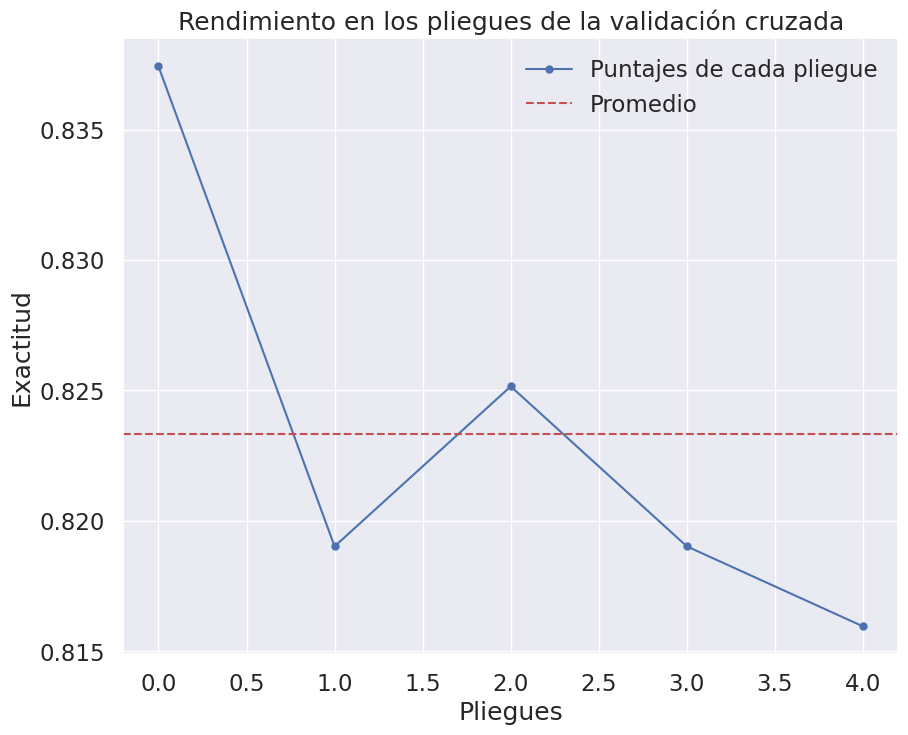

In [55]:

# Graficar los puntajes de cada pliegue
plt.plot(scores_modelo_1, 'bo-', label='Puntajes de cada pliegue')

# Graficar el promedio de los puntajes
plt.axhline(y=scores_modelo_1.mean(), color='r', linestyle='--', label='Promedio')

# Configurar la leyenda y los ejes
plt.legend()
plt.xlabel('Pliegues')
plt.ylabel('Exactitud')
plt.title('Rendimiento en los pliegues de la validación cruzada')
plt.show()

Vemos que en ningún pliegue hay un rendimiento significativamente diferente del promedio, por lo tanto podemos concluir que ajusta bien.

In [56]:
modelo_1.fit(X, y)
y_pred_modelo_1 = modelo_1.predict(X_test)

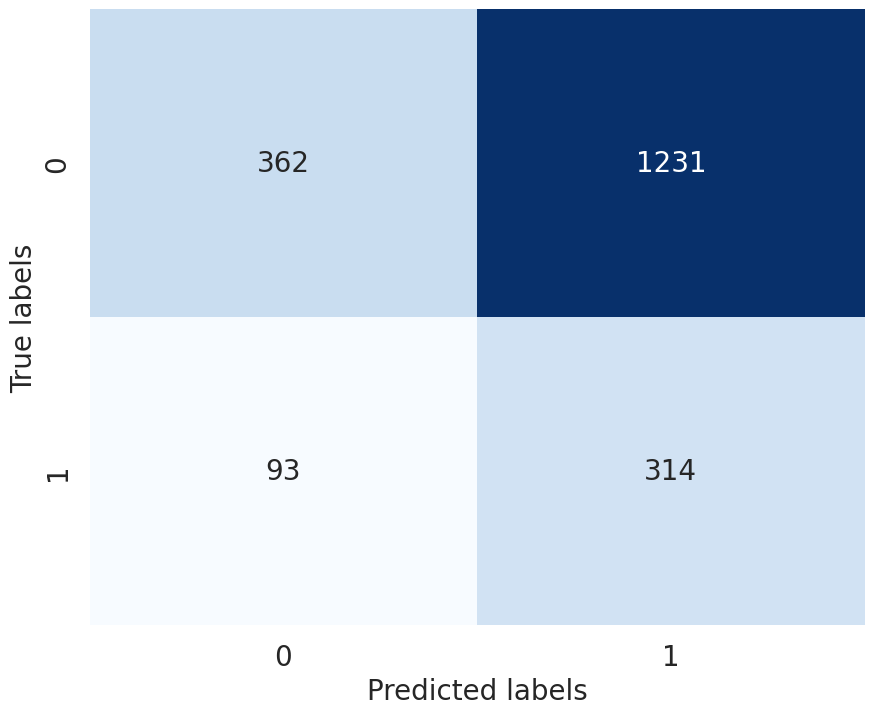

In [57]:
cm = confusion_matrix(y_test, y_pred_modelo_1)


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=ax,  annot_kws={"fontsize":20})
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
plt.show()

In [58]:
report = classification_report(y_test, y_pred_modelo_1)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.23      0.35      1593
           1       0.20      0.77      0.32       407

    accuracy                           0.34      2000
   macro avg       0.50      0.50      0.34      2000
weighted avg       0.68      0.34      0.35      2000



**RANDOM FOREST CLASSIFIER**

In [59]:
# Definir el modelo de clasificación
RandomForest = RandomForestClassifier()

# Definir los valores de los hiperparámetros a probar
param_grid_RandomForest = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
grid_search_RandomForest = GridSearchCV(RandomForest, param_grid_RandomForest, cv=5, scoring='recall')
grid_search_RandomForest.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='recall')

In [61]:
print("Mejor conjunto de hiperparámetros: ", grid_search_RandomForest.best_params_)
print("Puntaje de validación cruzada: ", grid_search_RandomForest.best_score_)

Mejor conjunto de hiperparámetros:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Puntaje de validación cruzada:  0.4717791411042945


In [62]:
rfc = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 200, random_state = 42)
rfc

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [63]:
# Definir el clasificador AdaBoost
adaboost_rfc = AdaBoostClassifier(base_estimator=rfc, random_state=42)
adaboost_rfc

AdaBoostClassifier(base_estimator=RandomForestClassifier(min_samples_split=5,
                                                         n_estimators=200,
                                                         random_state=42),
                   random_state=42)

In [64]:
# Definir los hiperparámetros a evaluar en GridSearchCV
param_grid_adaboost_rfc = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}

In [65]:
# Realizar la búsqueda de hiperparámetros mediante validación cruzada
grid_search_modelo_2 = GridSearchCV(adaboost_rfc, param_grid=param_grid_adaboost_rfc, cv=5, scoring='recall')
grid_search_modelo_2.fit(X, y)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(min_samples_split=5,
                                                                                n_estimators=200,
                                                                                random_state=42),
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [66]:
print("Mejor conjunto de hiperparámetros: ", grid_search_modelo_2.best_params_)
print("Puntaje de validación cruzada: ", grid_search_modelo_2.best_score_)

Mejor conjunto de hiperparámetros:  {'learning_rate': 0.01, 'n_estimators': 50}
Puntaje de validación cruzada:  0.461963190184049


In [67]:
modelo_2 = AdaBoostClassifier(base_estimator=rfc, random_state=42, learning_rate=0.01, n_estimators=50)
modelo_2

AdaBoostClassifier(base_estimator=RandomForestClassifier(min_samples_split=5,
                                                         n_estimators=200,
                                                         random_state=42),
                   learning_rate=0.01, random_state=42)

In [68]:
# Ajustar el modelo utilizando validación cruzada estratificada
scores_modelo_2 = cross_val_score(modelo_2, X, y, cv=5, scoring='recall')

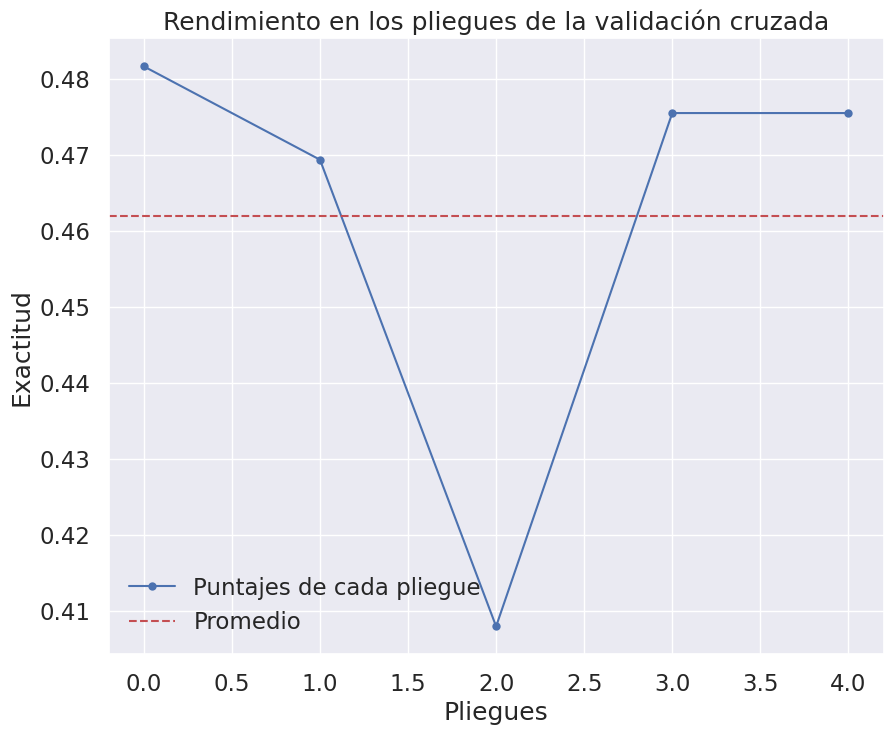

In [69]:
# Graficar los puntajes de cada pliegue
plt.plot(scores_modelo_2, 'bo-', label='Puntajes de cada pliegue')

# Graficar el promedio de los puntajes
plt.axhline(y=scores_modelo_2.mean(), color='r', linestyle='--', label='Promedio')

# Configurar la leyenda y los ejes
plt.legend()
plt.xlabel('Pliegues')
plt.ylabel('Exactitud')
plt.title('Rendimiento en los pliegues de la validación cruzada')
plt.show()

In [70]:
modelo_2.fit(X, y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(min_samples_split=5,
                                                         n_estimators=200,
                                                         random_state=42),
                   learning_rate=0.01, random_state=42)

In [71]:
y_pred_modelo_2 = modelo_2.predict(X_test)

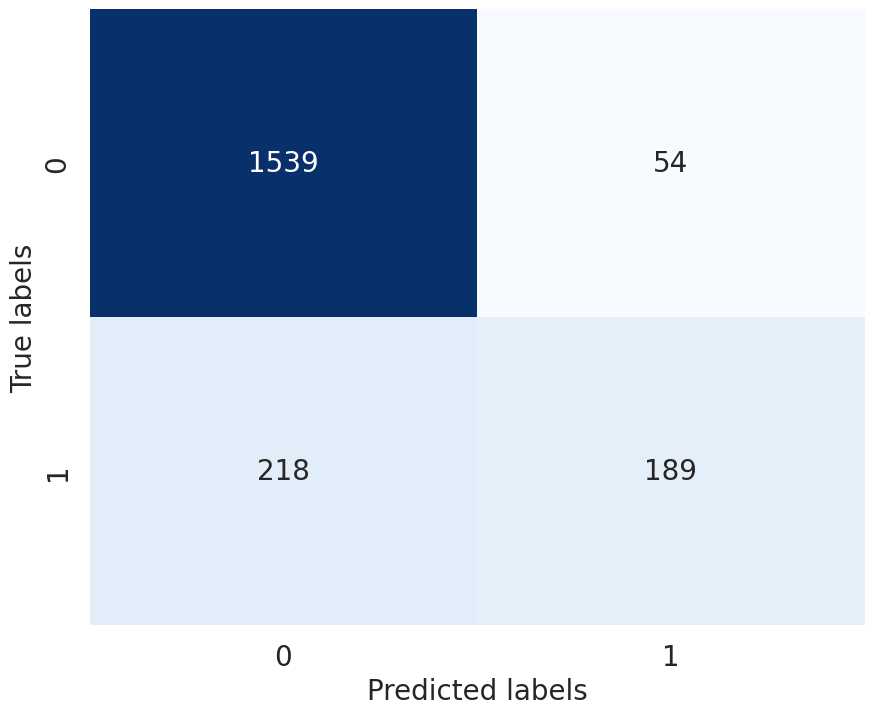

In [72]:
cm = confusion_matrix(y_test, y_pred_modelo_2)


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=ax,  annot_kws={"fontsize":20})
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
plt.show()

In [73]:
report = classification_report(y_test, y_pred_modelo_2)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



HIST GRADIENT BOOSTING CLASSIFIER

In [74]:
# Definir el modelo
HGBC = HistGradientBoostingClassifier()

# Definir los hiperparámetros a optimizar
params_HGBC = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

In [75]:
# Crear un objeto GridSearchCV
grid_search_HGBC = GridSearchCV(HGBC, params_HGBC, cv=5, scoring='recall', n_jobs=-1)
grid_search_HGBC.fit(X, y)

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'max_iter': [100, 200, 300]},
             scoring='recall')

In [76]:
print("Mejor conjunto de hiperparámetros: ", grid_search_HGBC.best_params_)
print("Puntaje de validación cruzada: ", grid_search_HGBC.best_score_)

Mejor conjunto de hiperparámetros:  {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 300}
Puntaje de validación cruzada:  0.4877300613496932


In [77]:
modelo_3 = HistGradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, max_iter = 300)

In [78]:
# Ajustar el modelo utilizando validación cruzada estratificada
scores_modelo_3 = cross_val_score(modelo_3, X, y, cv=5, scoring='recall')

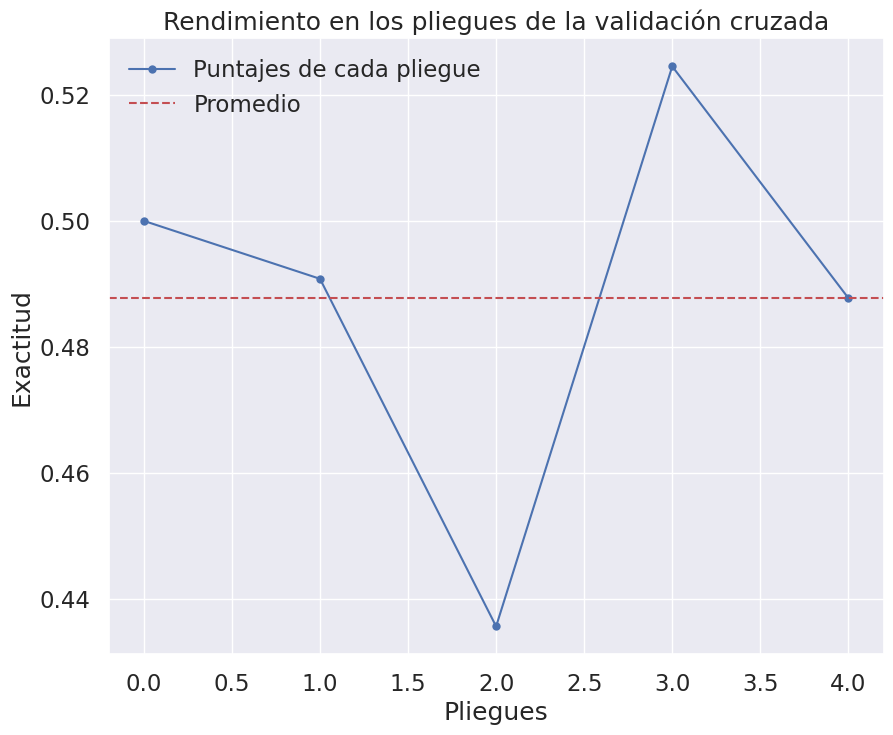

In [79]:
# Graficar los puntajes de cada pliegue
plt.plot(scores_modelo_3, 'bo-', label='Puntajes de cada pliegue')

# Graficar el promedio de los puntajes
plt.axhline(y=scores_modelo_3.mean(), color='r', linestyle='--', label='Promedio')

# Configurar la leyenda y los ejes
plt.legend()
plt.xlabel('Pliegues')
plt.ylabel('Exactitud')
plt.title('Rendimiento en los pliegues de la validación cruzada')
plt.show()

  La métrica en los pliegues no se desvía considerablemnte del promedio, y el rango no es muy alto. Entonces, consideramos que el modelo ajusta bien.

In [80]:
modelo_3.fit(X, y)

HistGradientBoostingClassifier(max_depth=5, max_iter=300)

In [81]:
y_pred_HGBC = modelo_3.predict(X_test)

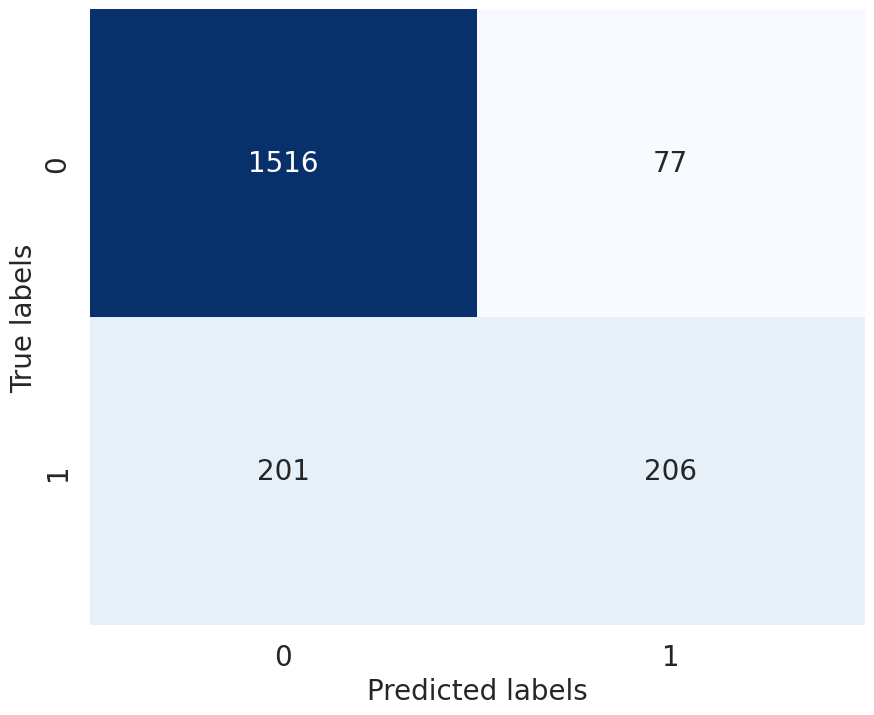

In [82]:
cm = confusion_matrix(y_test, y_pred_HGBC)


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=ax,  annot_kws={"fontsize":20})
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
plt.show()

In [83]:
report = classification_report(y_test, y_pred_HGBC)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.73      0.51      0.60       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Curva ROC para especificidad y sensibilidad

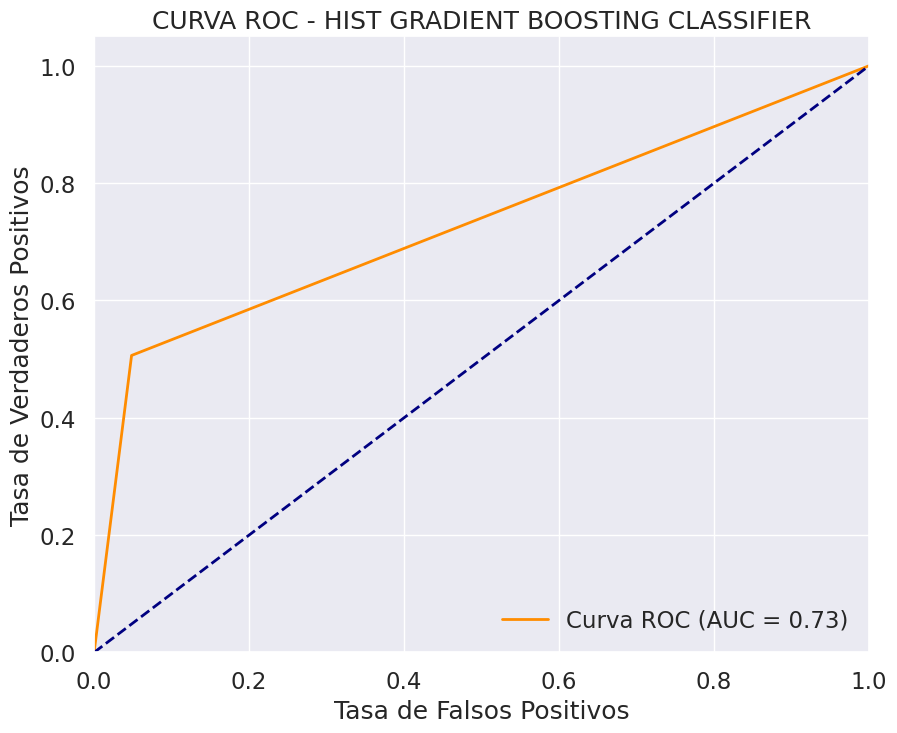

In [84]:
# calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_HGBC)
roc_auc = auc(fpr, tpr)

# graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('CURVA ROC - HIST GRADIENT BOOSTING CLASSIFIER')
plt.legend(loc="lower right")
plt.show()

Luego de modelizar con los 3 modelos:

*   Regresion logistica + boosting
*   Random forrest + boosting
*   Hist Gradient Boosting Classifier

Nos quedamos con el HIST GRADIENT BOOSTING CLASSIFIER que es el que tiene mejor performance. 

El recall en abandono es 51% y un AUC de 73%

Muestra de testeo para validar nuestra operativa cuando con clientes que el modelo no conozca

In [85]:
data_test['Probabilidad de Abandono'] = modelo_3.predict_proba(X_test)[:, 1]
data_test.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,predicted_cluster,Probabilidad de Abandono
5702,15749540,-0.678012,-0.278604,7,-1.225848,2,1,0,-0.100981,0,1,0,0,3,0.015181
3667,15807340,-1.298818,-0.564665,4,0.874084,2,0,0,-0.782806,0,1,1,0,1,0.057491
1617,15801062,-0.967722,0.102810,4,-1.225848,2,0,1,0.092914,0,0,0,1,3,0.018629
5673,15572801,-0.119286,-0.469311,5,1.008222,2,0,0,-1.150111,0,1,0,1,1,0.037438
4272,15600708,-0.108939,-0.469311,3,0.021491,1,1,1,1.190357,0,0,0,1,2,0.039054


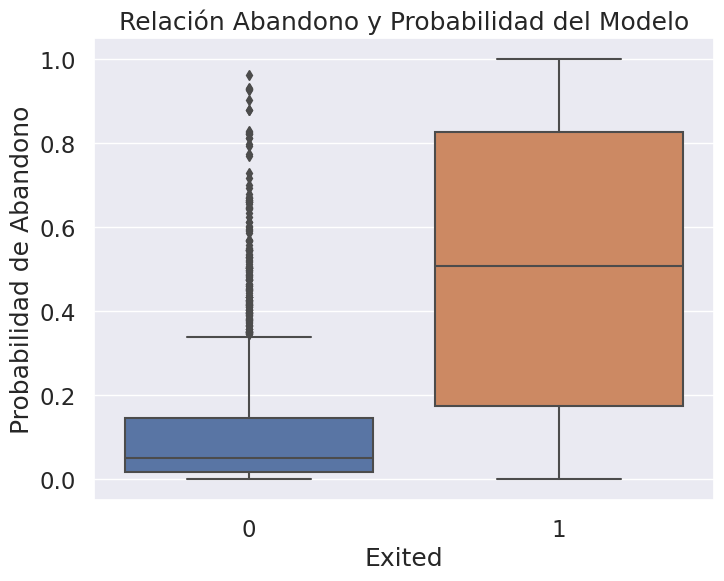

In [86]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
sns.boxplot (x='Exited', y='Probabilidad de Abandono', data= data_test)
plt.title("Relación Abandono y Probabilidad del Modelo")

plt.show()

Vemos que la probabilidad de abandono ordena bien. Los clientes con mas probabilidad de abandono son los que efectivamente abandonan.

Nuestra decision empresarial es tener una campaña de fidelización para los clientes que el modelo predice una probabilidad de abandono mayor a %50.

In [87]:
clientes_objetivo= data_test.loc[data_test['Probabilidad de Abandono'] > 0.5]
clientes_objetivo

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,predicted_cluster,Probabilidad de Abandono
7068,15730793,0.501521,1.437761,3,0.553311,1,1,1,0.970577,1,0,1,0,0,0.681029
2350,15646764,-0.346915,1.819175,3,0.681775,2,1,0,-1.128390,1,0,1,0,0,0.944296
4799,15656683,-1.029802,1.247053,1,-1.225848,1,0,0,-0.634797,1,1,0,0,0,0.904065
3982,15627665,-0.377955,0.674932,4,-1.225848,1,1,0,-0.447083,1,1,0,0,3,0.599744
4994,15585580,1.505158,1.247053,9,1.453795,1,1,1,-0.648285,1,0,1,0,0,0.511368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,15691817,-1.071189,0.484225,5,-1.225848,3,0,0,-1.645541,1,0,0,1,3,0.945665
5886,15812920,-0.450383,0.102810,5,0.226121,1,0,1,1.417343,0,1,1,0,2,0.668822
5750,15583392,0.998166,-0.183251,9,0.950255,3,1,0,-0.254224,1,1,1,0,1,0.993655
4608,15614103,2.063884,0.293517,8,0.694836,1,0,1,-0.853352,1,1,1,0,1,0.535023


Ahora, vamos a entender que características tienen nuestros clientes onjetivo para generalizar nuestras conclusiones.

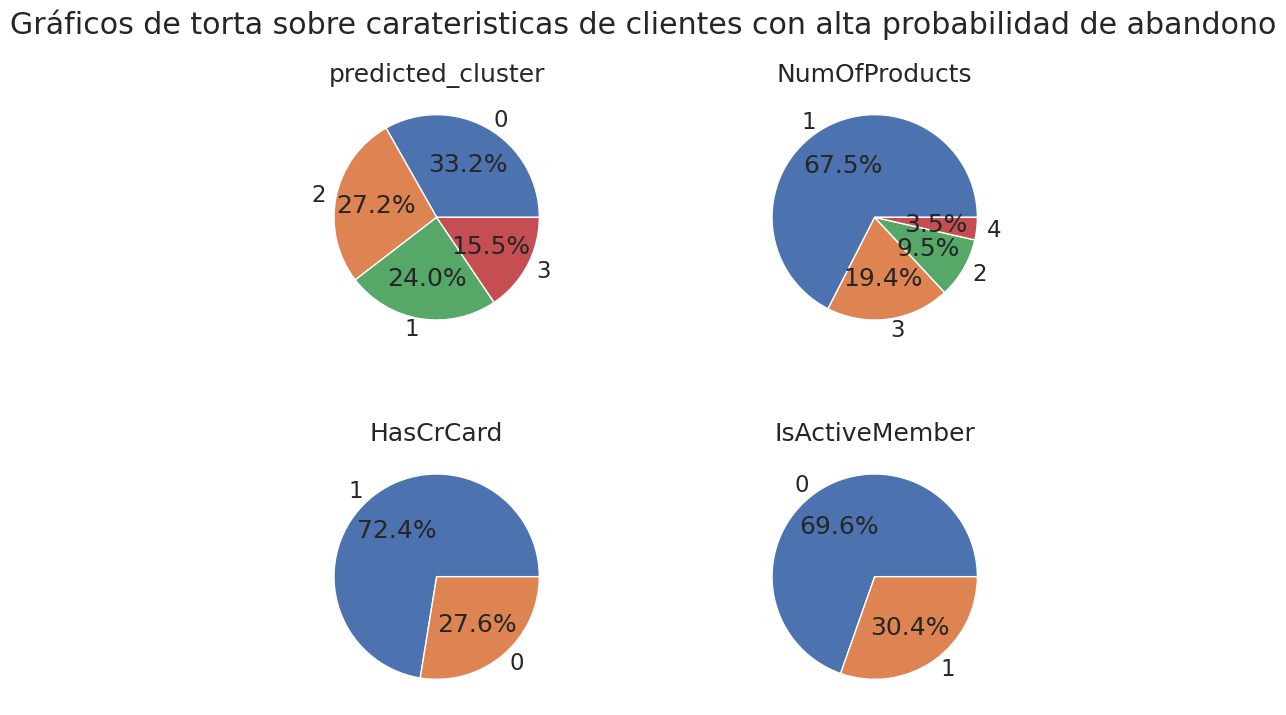

In [88]:
# Seleccionar las columnas para hacer los gráficos de torta
columnas = ['predicted_cluster', 'NumOfProducts', 'HasCrCard','IsActiveMember']

# Configurar el tamaño del gráfico general
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['text.color'] = 'white'
sns.set(font_scale=1.5)


# Hacer el gráfico de torta para cada columna y graficarlos juntos
for i, columna in enumerate(columnas):
    plt.subplot(2, 2, i+1)  # Seleccionar el subplot correspondiente
    frecuencias = clientes_objetivo[columna].value_counts()
    plt.pie(frecuencias.values, labels=frecuencias.index, autopct='%1.1f%%')
    plt.title(columna)  # Configurar el título del subplot

# Configurar el título del gráfico general
plt.suptitle('Gráficos de torta sobre carateristicas de clientes con alta probabilidad de abandono')

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Mostrar el gráfico
plt.show()

A modo de conclusión, el grupo que tiene mas probabilidades de abandono son aquellas personas que no son miembros activos y tienen balance medio/alto, y solo tienen una tarjeta de credito.

In [89]:
Campaña = data_test.query('IsActiveMember != 1 and HasCrCard == 1 and predicted_cluster != 3 and NumOfProducts == 1')
Campaña.value_counts('Exited')

Exited
0    184
1    102
dtype: int64

In [90]:
data_test.value_counts('Exited')

Exited
0    1593
1     407
dtype: int64

Si la campaña fue exitosa 103 clientes no hubieran abandonado. Reduciendo así, de 407 a 304 la cantidad de clientes que abandonan de una muestra de 2000. Es decir, del data_test el %20,35 de los clientes abandonaron, si se hubiera hecho una campaña tomando en cuenta las conclusiones, hubieran abandonado un %15,2. Por lo tanto, tendríamos una mejora al disminur 5 puntos de abandono con el modelo propuesto.